## Libraries

In [1]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from confidenceinterval.ModelEvaluationUtils import (
    train_and_evaluate_sofa,
    z_score,
    plot_roc_auc,
    train_and_evaluate_models, 
    calculate_ci_models, 
    plot_roc_auc_models,
    select_data
)
from confidenceinterval.goldstandard import (
    evaluation_metrics,
    max_th_f1
)

## Load the data, All variables

In [2]:
x_train, x_test, y_train, y_test = select_data('johan_variables', 68, 'ya_imputados/mimic1236f_complete.csv', 'ya_imputados/eicu1236f_complete.csv') 
x_train.shape, x_test.shape, y_train.shape, y_test.shape # Print the shapes of the training and testing data and labels

((7511, 68), (3786, 68), (7511,), (3786,))

## Models

In [3]:
models = [LogisticRegression(solver= "sag"), #Stochastic Average Gradient (SAG) is efficient for large datasets by updating model parameters with small random batches, reducing computation time.
          SVC(probability=True), #probability=True enables probability estimates using 5-fold cross-validation.
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),
          MLPClassifier(),
          XGBClassifier(),
          LGBMClassifier()]

## Training and Testing the model

In [4]:
# z-score the data
x_train_z, x_test_z = z_score(x_train, x_test)
# stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# train and evaluate the model
results = train_and_evaluate_models(x_train_z, y_train, x_test_z, y_test, skf, models)


Training and evaluating model: LogisticRegression


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 1: Train AUC: 0.9688
 Validation AUC: 0.9666
 Test AUC: 0.9001


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 2: Train AUC: 0.9683
 Validation AUC: 0.9715
 Test AUC: 0.8990


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 3: Train AUC: 0.9702
 Validation AUC: 0.9618
 Test AUC: 0.9022


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 4: Train AUC: 0.9686
 Validation AUC: 0.9710
 Test AUC: 0.9011


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 5: Train AUC: 0.9723
 Validation AUC: 0.9543
 Test AUC: 0.8997
Training and evaluating model: SVC
Fold 1: Train AUC: 0.9876
 Validation AUC: 0.9601
 Test AUC: 0.8811
Fold 2: Train AUC: 0.9866
 Validation AUC: 0.9689
 Test AUC: 0.8739
Fold 3: Train AUC: 0.9868
 Validation AUC: 0.9635
 Test AUC: 0.8809
Fold 4: Train AUC: 0.9866
 Validation AUC: 0.9658
 Test AUC: 0.8728
Fold 5: Train AUC: 0.9875
 Validation AUC: 0.9604
 Test AUC: 0.8733
Training and evaluating model: DecisionTreeClassifier
Fold 1: Train AUC: 1.0000
 Validation AUC: 0.7750
 Test AUC: 0.7015
Fold 2: Train AUC: 1.0000
 Validation AUC: 0.8268
 Test AUC: 0.6896
Fold 3: Train AUC: 1.0000
 Validation AUC: 0.7968
 Test AUC: 0.6904
Fold 4: Train AUC: 1.0000
 Validation AUC: 0.7905
 Test AUC: 0.6905
Fold 5: Train AUC: 1.0000
 Validation AUC: 0.8085
 Test AUC: 0.7037
Training and evaluating model: RandomForestClassifier
Fold 1: Train AUC: 1.0000
 Validation AUC: 0.9665
 Test AUC: 0.8986
Fold 2: Train AUC: 1.0000
 Validation AUC

c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2: Train AUC: 1.0000
 Validation AUC: 0.9494
 Test AUC: 0.8546
Fold 3: Train AUC: 1.0000
 Validation AUC: 0.9551
 Test AUC: 0.8888


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4: Train AUC: 1.0000
 Validation AUC: 0.9497
 Test AUC: 0.8715
Fold 5: Train AUC: 1.0000
 Validation AUC: 0.9412
 Test AUC: 0.8622
Training and evaluating model: XGBClassifier
Fold 1: Train AUC: 1.0000
 Validation AUC: 0.9713
 Test AUC: 0.8948
Fold 2: Train AUC: 1.0000
 Validation AUC: 0.9701
 Test AUC: 0.8898
Fold 3: Train AUC: 1.0000
 Validation AUC: 0.9656
 Test AUC: 0.8978
Fold 4: Train AUC: 1.0000
 Validation AUC: 0.9670
 Test AUC: 0.8964
Fold 5: Train AUC: 1.0000
 Validation AUC: 0.9619
 Test AUC: 0.8961
Training and evaluating model: LGBMClassifier
[LightGBM] [Info] Number of positive: 932, number of negative: 5076
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7066
[LightGBM] [Info] Number of data points in the train set: 6008, number of used features: 68
[LightGBM] [I

### Validation data result

In [5]:
# Calculate AUC and confidence intervals for validation data
auc_results_val= calculate_ci_models(results, truth_key='val_truths', preds_key='val_preds', alpha=0.95)

for model_name, auc, (ci_lower, ci_upper) in auc_results_val:
    print(f"AUC on validation data for {model_name}: {auc:.4g} 95% CI ({ci_lower:.4g} - {ci_upper:.4g})")


AUC on validation data for LogisticRegression: 0.9648 95% CI (0.9606 - 0.969)
AUC on validation data for SVC: 0.9634 95% CI (0.9591 - 0.9676)
AUC on validation data for DecisionTreeClassifier: 0.7995 95% CI (0.7905 - 0.8086)
AUC on validation data for RandomForestClassifier: 0.9619 95% CI (0.9576 - 0.9663)
AUC on validation data for GradientBoostingClassifier: 0.9661 95% CI (0.962 - 0.9701)
AUC on validation data for MLPClassifier: 0.9469 95% CI (0.9419 - 0.952)
AUC on validation data for XGBClassifier: 0.9669 95% CI (0.9629 - 0.971)
AUC on validation data for LGBMClassifier: 0.9678 95% CI (0.9638 - 0.9718)


### Test data result

In [6]:
# Calculate AUC and confidence intervals for validation data
auc_results_test = calculate_ci_models(results, truth_key='test_truths', preds_key='test_preds', alpha=0.95)

for model_name, auc, (ci_lower, ci_upper) in auc_results_test:
    print(f"AUC on test data for {model_name}: {auc:.4g} 95% CI ({ci_lower:.4g} - {ci_upper:.4g})")

AUC on test data for LogisticRegression: 0.9003 95% CI (0.896 - 0.9046)
AUC on test data for SVC: 0.8763 95% CI (0.8717 - 0.881)
AUC on test data for DecisionTreeClassifier: 0.6951 95% CI (0.6886 - 0.7017)
AUC on test data for RandomForestClassifier: 0.8979 95% CI (0.8936 - 0.9022)
AUC on test data for GradientBoostingClassifier: 0.8934 95% CI (0.889 - 0.8978)
AUC on test data for MLPClassifier: 0.8716 95% CI (0.8668 - 0.8763)
AUC on test data for XGBClassifier: 0.8949 95% CI (0.8906 - 0.8993)
AUC on test data for LGBMClassifier: 0.9011 95% CI (0.8968 - 0.9053)


## ROC curve - Train

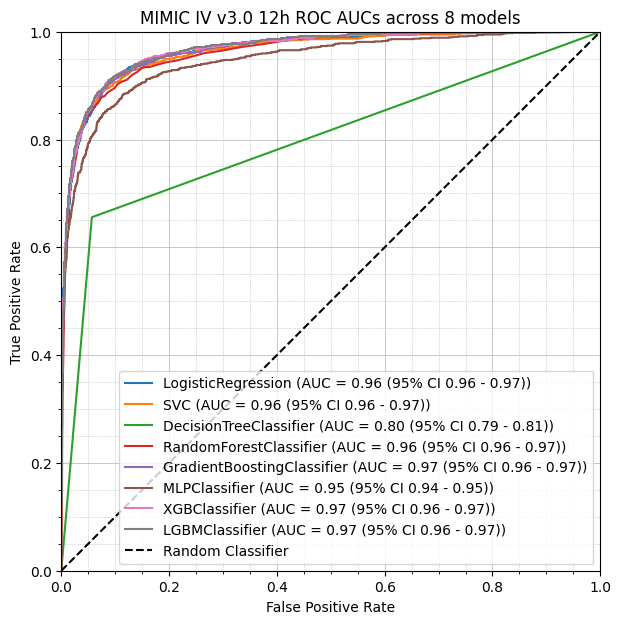

In [7]:
plot_roc_auc_models(results, 'val_truths', 'val_preds', auc_results_val,'MIMIC IV v3.0 12h ROC AUCs across 8 models')

## ROC curve - Test

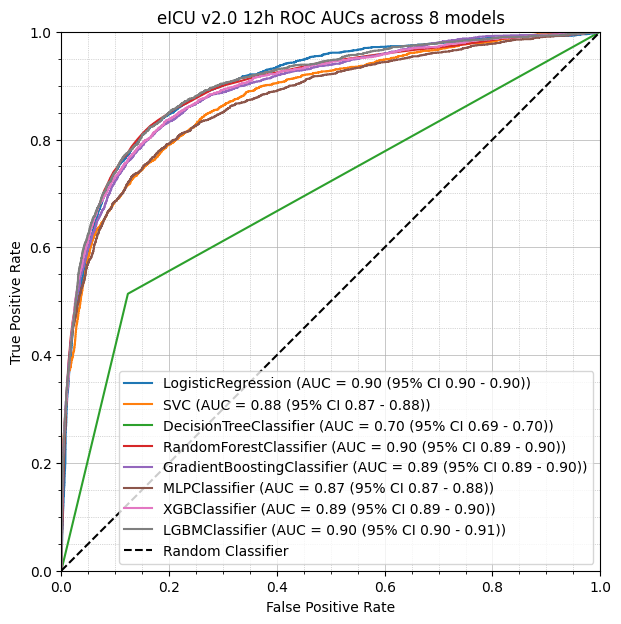

In [8]:
plot_roc_auc_models(results, 'test_truths', 'test_preds', auc_results_test,'eICU v2.0 12h ROC AUCs across 8 models')

## ROC curve - SOFA

AUC on validation data for SOFA: 0.7331 95% CI (0.7231 - 0.7431)
AUC on test data for SOFA: 0.8239 95% CI (0.8118 - 0.836)


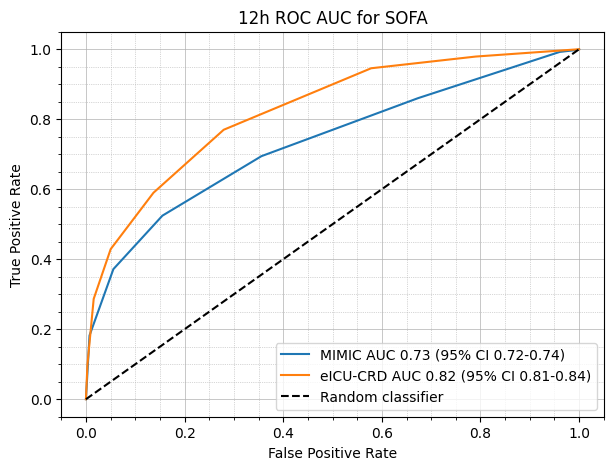

In [9]:
x_train_sofa, x_test_sofa, y_train_sofa, y_test_sofa = select_data('SOFA', 1, 'ya_imputados/mimic1236f_complete.csv', 'ya_imputados/eicu1236f_complete.csv') 
results_sofa = train_and_evaluate_sofa(x_train_sofa, y_train_sofa, x_test_sofa, y_test_sofa)
auc_results_val_sofa= calculate_ci_models(results_sofa, truth_key='val_truths', preds_key='val_preds', alpha=0.95)
auc_results_test_sofa = calculate_ci_models(results_sofa, truth_key='test_truths', preds_key='test_preds', alpha=0.95)
for model_name, auc, (ci_lower, ci_upper) in auc_results_val_sofa:
    print(f"AUC on validation data for {model_name}: {auc:.4g} 95% CI ({ci_lower:.4g} - {ci_upper:.4g})")
for model_name, auc, (ci_lower, ci_upper) in auc_results_test_sofa:
    print(f"AUC on test data for {model_name}: {auc:.4g} 95% CI ({ci_lower:.4g} - {ci_upper:.4g})")
_=plot_roc_auc(results_sofa['SOFA']['val_truths'], results_sofa['SOFA']['val_preds'], results_sofa['SOFA']['test_truths'], results_sofa['SOFA']['test_preds'], auc_results_val_sofa[0][2][0], auc_results_val_sofa[0][2][1], auc_results_test_sofa[0][2][0], auc_results_test_sofa[0][2][1],'12h ROC AUC for SOFA')

## Evaluation Metrics

### LGBM with Fine Tuning - Optuna

In [10]:
modelsft = [LGBMClassifier(objective='binary',
                               boosting_type='gbdt',
                               metric='auc',
                               device_type='gpu',
                               importance_type='gain',
                               verbosity=-1,
                               feature_pre_filter=False,  
                               lambda_l1= 0.0,
                               lambda_l2= 0.0,
                               num_leaves=180,
                               max_depth=-10,
                               learning_rate=0.1,
                               feature_fraction=0.8,
                               bagging_fraction= 0.8850084267141368,
                               bagging_freq=6,
                               min_child_samples=20)]


Training and evaluating model: LGBMClassifier
Fold 1: Train AUC: 1.0000
 Validation AUC: 0.9719
 Test AUC: 0.9057
Fold 2: Train AUC: 1.0000
 Validation AUC: 0.9746
 Test AUC: 0.9034
Fold 3: Train AUC: 1.0000
 Validation AUC: 0.9661
 Test AUC: 0.9058
Fold 4: Train AUC: 1.0000
 Validation AUC: 0.9670
 Test AUC: 0.9037
Fold 5: Train AUC: 1.0000
 Validation AUC: 0.9615
 Test AUC: 0.9019
AUC on validation data for LGBMClassifier: 0.9682 95% CI (0.9642 - 0.9721)
AUC on test data for LGBMClassifier: 0.9041 95% CI (0.8999 - 0.9083)


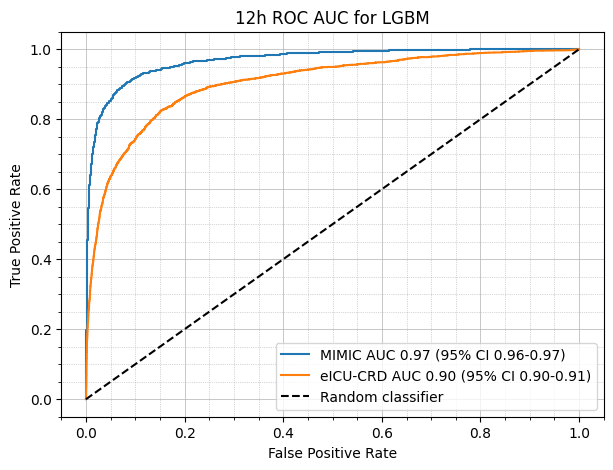

In [11]:
# z-score the data
x_train_ft, x_test_ft = z_score(x_train, x_test)
# stratified k-fold cross-validation
skfft = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# train and evaluate the model
resultsft = train_and_evaluate_models(x_train_ft, y_train, x_test_ft, y_test, skfft, modelsft)
# Calculate AUC and confidence intervals for validation data
auc_results_valft= calculate_ci_models(resultsft, truth_key='val_truths', preds_key='val_preds', alpha=0.95)
for model_name, auc, (ci_lower, ci_upper) in auc_results_valft:
    print(f"AUC on validation data for {model_name}: {auc:.4g} 95% CI ({ci_lower:.4g} - {ci_upper:.4g})")
# Calculate AUC and confidence intervals for test data
auc_results_testft = calculate_ci_models(resultsft, truth_key='test_truths', preds_key='test_preds', alpha=0.95)
for model_name, auc, (ci_lower, ci_upper) in auc_results_testft:
    print(f"AUC on test data for {model_name}: {auc:.4g} 95% CI ({ci_lower:.4g} - {ci_upper:.4g})")
fpr_valft, tpr_valft, th_valft, fpr_testft, tpr_testft, th_testft = plot_roc_auc(resultsft['LGBMClassifier']['val_truths'], resultsft['LGBMClassifier']['val_preds'], resultsft['LGBMClassifier']['test_truths'], resultsft['LGBMClassifier']['test_preds'], auc_results_valft[0][2][0], auc_results_valft[0][2][1], auc_results_testft[0][2][0], auc_results_testft[0][2][1],'12h ROC AUC for LGBM')

## Max F1 - validation 


Optimal Threshold for Maximum F1 Score: 0.2739
Maximum F1 Score: 0.8243


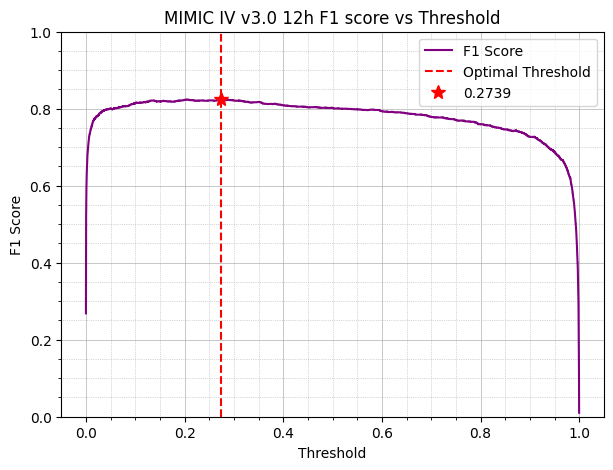

Validation results:
Threshold: 0.2739
Precision: 0.8601
Recall: 0.7914
F1 Score: 0.8243


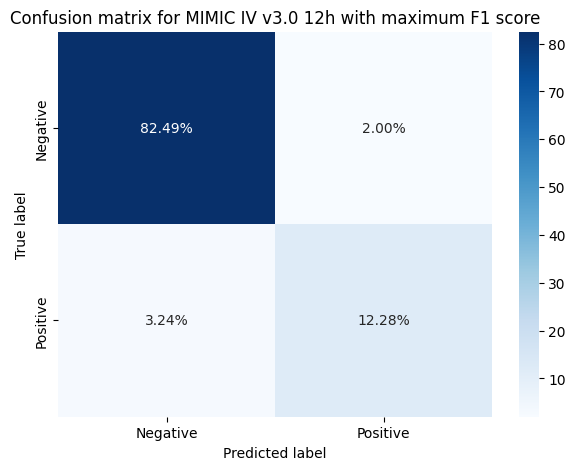

Test results:
With the validation threshold: 0.2739
Precision: 0.6852
Recall: 0.5937
F1 Score: 0.6362


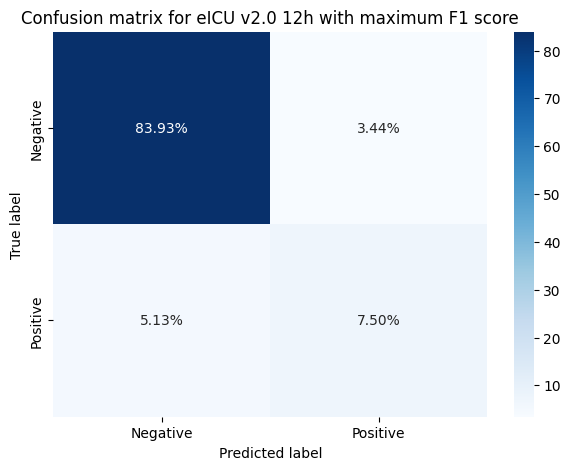

In [15]:
max_th_f1(th_valft,resultsft['LGBMClassifier']['val_truths'],resultsft['LGBMClassifier']['val_preds'],  resultsft['LGBMClassifier']['test_truths'],resultsft['LGBMClassifier']['test_preds'],'Confusion matrix for MIMIC IV v3.0 12h with maximum F1 score','Confusion matrix for eICU v2.0 12h with maximum F1 score','MIMIC IV v3.0 12h F1 score vs Threshold')